In [1]:
%matplotlib inline

from dicom_utils import *
import numpy as np 
import pandas as pd 
import os
import pydicom
import matplotlib.pyplot as plt
#import assd_func as af
from skimage import morphology
import matplotlib.patches as mpatches
import assd_func_Sobel_2 as af_Sobel
import time
import random
from scipy.stats import uniform,norm

In [2]:
organ = "prostate" #Change this your organ

In [3]:
dicom_dir = "/home/vily/MRI-Project/contour_segmentation/Prostate Cases/1"
output_dir = "Output"
images_1, slices_1, contours_1, labels_1, dummy_mask_1 = main(dicom_dir, output_dir)

In [4]:
dicom_dir = "/home/vily/MRI-Project/contour_segmentation/Prostate Cases/3"
output_dir = "Output"
images_3, slices_3, contours_3, labels_3, dummy_mask_3 = main(dicom_dir, output_dir)

In [5]:
dicom_dir = "/home/vily/MRI-Project/contour_segmentation/Prostate Cases/4"
output_dir = "Output"
images_4, slices_4, contours_4, labels_4, dummy_mask_4 = main(dicom_dir, output_dir)

   Missing contours for structure: sigmoid


In [6]:
dicom_dir = "/home/vily/MRI-Project/contour_segmentation/Prostate Cases/5"
output_dir = "Output"
images_5, slices_5, contours_5, labels_5, dummy_mask_5 = main(dicom_dir, output_dir)

   Missing contours for structure: CTV_
   Missing contours for structure: SeminalVes_Dist
   Missing contours for structure: Hot Spot 7210 cGy (Rectum)
   Missing contours for structure: Hot Spot 7350 cGy (Total PTV)


=> Patient 5 has no prostate (fossa)

In [7]:
dicom_dir = "/home/vily/MRI-Project/contour_segmentation/Prostate Cases/6"
output_dir = "Output"
images_6, slices_6, contours_6, labels_6, dummy_mask_6 = main(dicom_dir, output_dir)

In [8]:
dicom_dir = "/home/vily/MRI-Project/contour_segmentation/Prostate Cases/7"
output_dir = "Output"
images_7, slices_7, contours_7, labels_7, dummy_mask_7 = main(dicom_dir, output_dir)

In [9]:
dicom_dir = "/home/vily/MRI-Project/contour_segmentation/Prostate Cases/8"
output_dir = "Output"
images_8, slices_8, contours_8, labels_8, dummy_mask_8 = main(dicom_dir, output_dir)

In [10]:
dicom_dir = "/home/vily/MRI-Project/contour_segmentation/Prostate Cases/9"
output_dir = "Output"
images_9, slices_9, contours_9, labels_9, dummy_mask_9 = main(dicom_dir, output_dir)

In [11]:
dicom_dir = "/home/vily/MRI-Project/contour_segmentation/Prostate Cases/10"
output_dir = "Output"
images_10, slices_10, contours_10, labels_10, dummy_mask_10 = main(dicom_dir, output_dir)

   Missing contours for structure: ROI_1


# Rectum

In [12]:
len(contours_1)

25

In [13]:
def find_roi_slices(images, labels, i):
    roi_z = []
    for j in range(images.shape[0]):
        if True in np.unique(labels[..., i][j, ...] > 0):
            roi_z.append(j)
    return roi_z

def find_organ_i(organ, contours):
    contour_table = pd.DataFrame()
    number = []
    name = []
    for i in range(len(contours)):
        number.append(contours[i]["number"])
        name.append(contours[i]["name"])
    #contour_table["number"] = number
    contour_table["name"] = name
    contour_table
    organ_i =  contour_table[contour_table["name"].str.contains(organ)].index.tolist()[0]
    return organ_i

In [14]:
organ_i_1 =  find_organ_i(organ, contours_1)
organ_i_1

1

In [15]:
roi_z_1 = find_roi_slices(images_1, labels_1, organ_i_1)

(-0.5, 511.5, 511.5, -0.5)

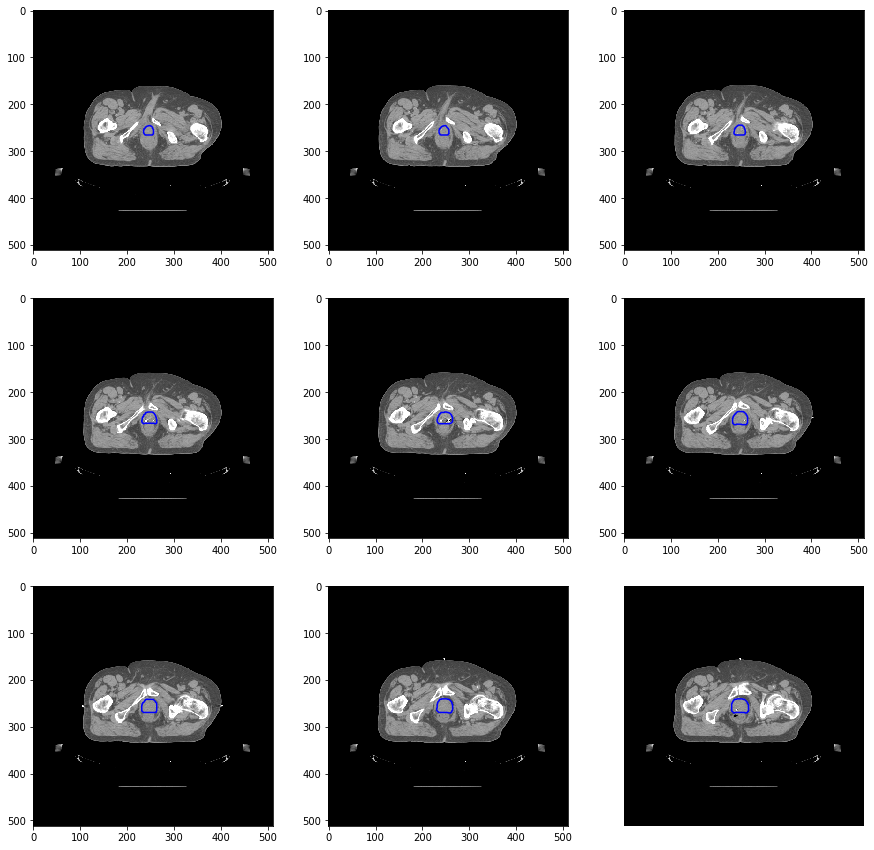

In [16]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images_1[i + roi_z_1[0], ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(labels_1[..., organ_i_1][i + 63, ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images_2[i + 63, ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(labels_2[..., organ_i][i + 63, ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

In [17]:
organ_i_3 =  find_organ_i(organ, contours_3)
organ_i_3

6

In [18]:
roi_z_3 = find_roi_slices(images_3, labels_3, organ_i_3)

(-0.5, 511.5, 511.5, -0.5)

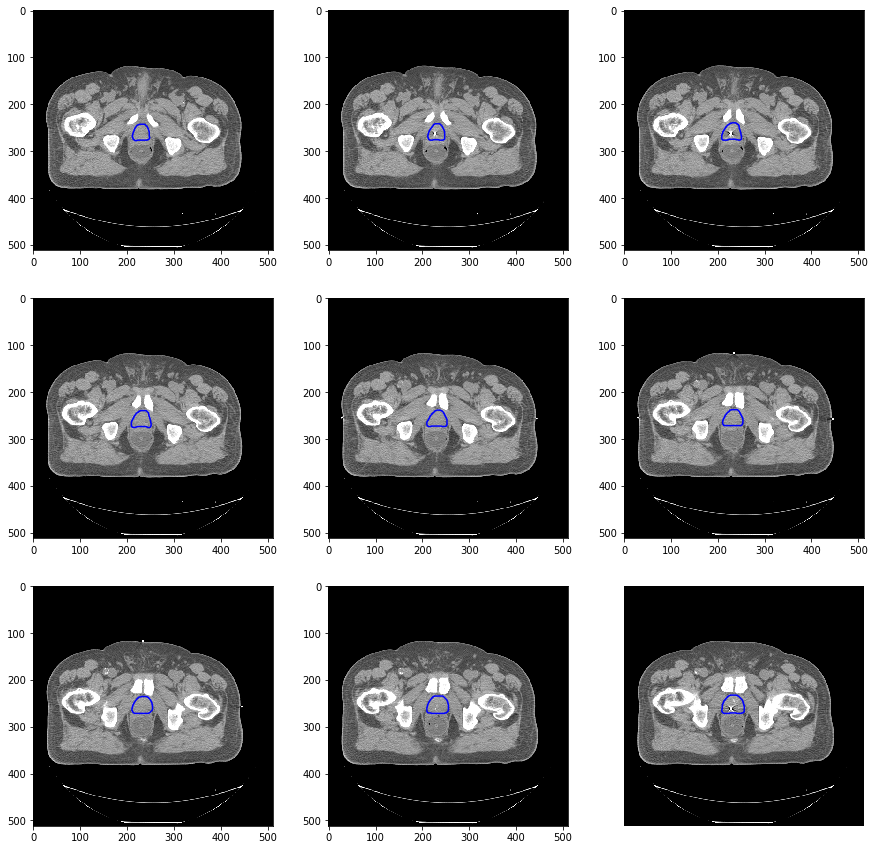

In [19]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images_3[i + roi_z_3[0], ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(labels_3[..., organ_i_3][i + roi_z_3[0], ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

In [20]:
organ_i_4 =  find_organ_i(organ, contours_4)
organ_i_4

3

In [21]:
roi_z_4 = find_roi_slices(images_4, labels_4, organ_i_4)

(-0.5, 511.5, 511.5, -0.5)

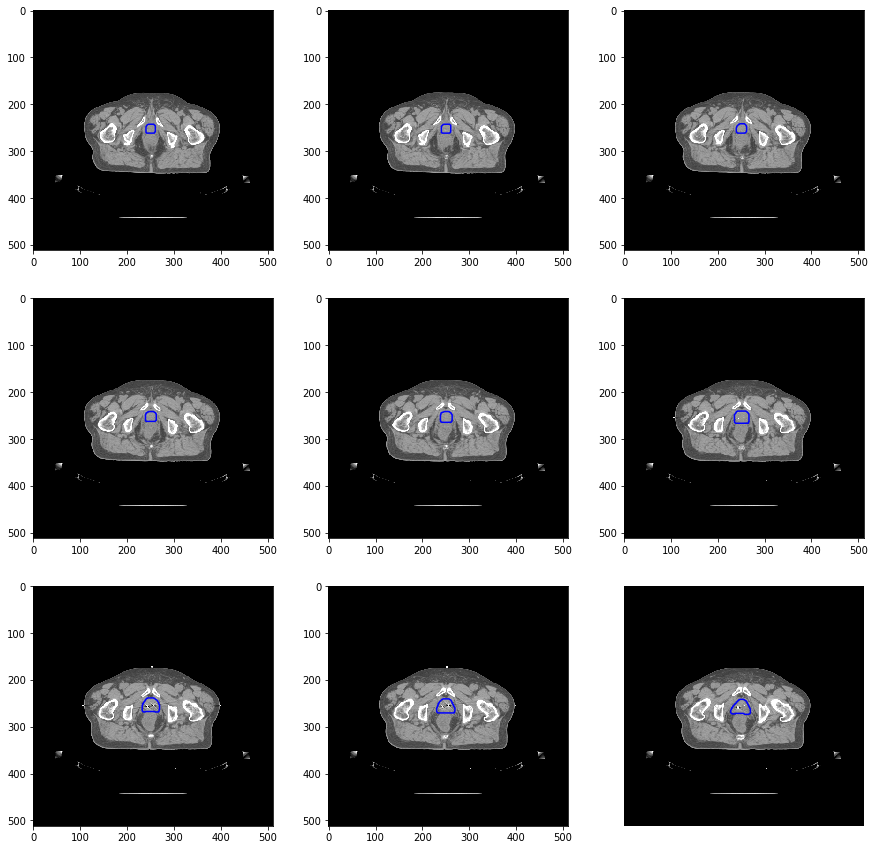

In [22]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images_4[i + roi_z_4[0], ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(labels_4[..., organ_i_4][i + roi_z_4[0], ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

In [24]:
organ_i_6 =  find_organ_i(organ, contours_6)
organ_i_6

1

In [25]:
roi_z_6 = find_roi_slices(images_6, labels_6, organ_i_6)

(-0.5, 511.5, 511.5, -0.5)

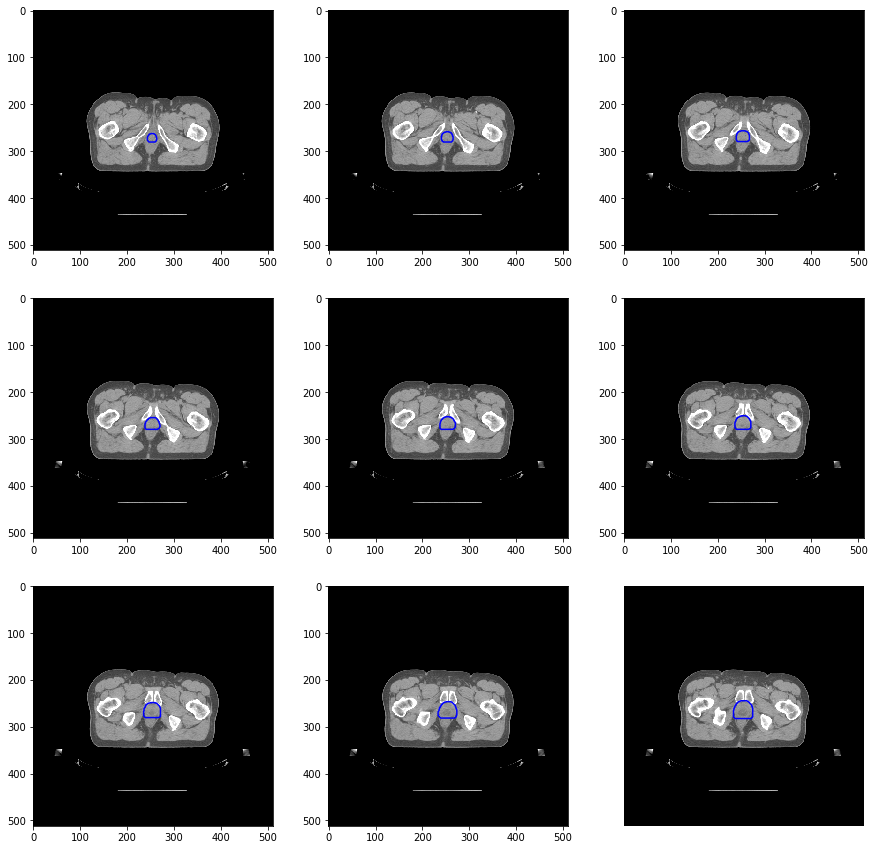

In [26]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images_6[i + roi_z_6[0], ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(labels_6[..., organ_i_6][i + roi_z_6[0], ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

In [27]:
organ_i_7 =  find_organ_i(organ, contours_7)
organ_i_7

1

In [28]:
roi_z_7 = find_roi_slices(images_7, labels_7, organ_i_7)

(-0.5, 511.5, 511.5, -0.5)

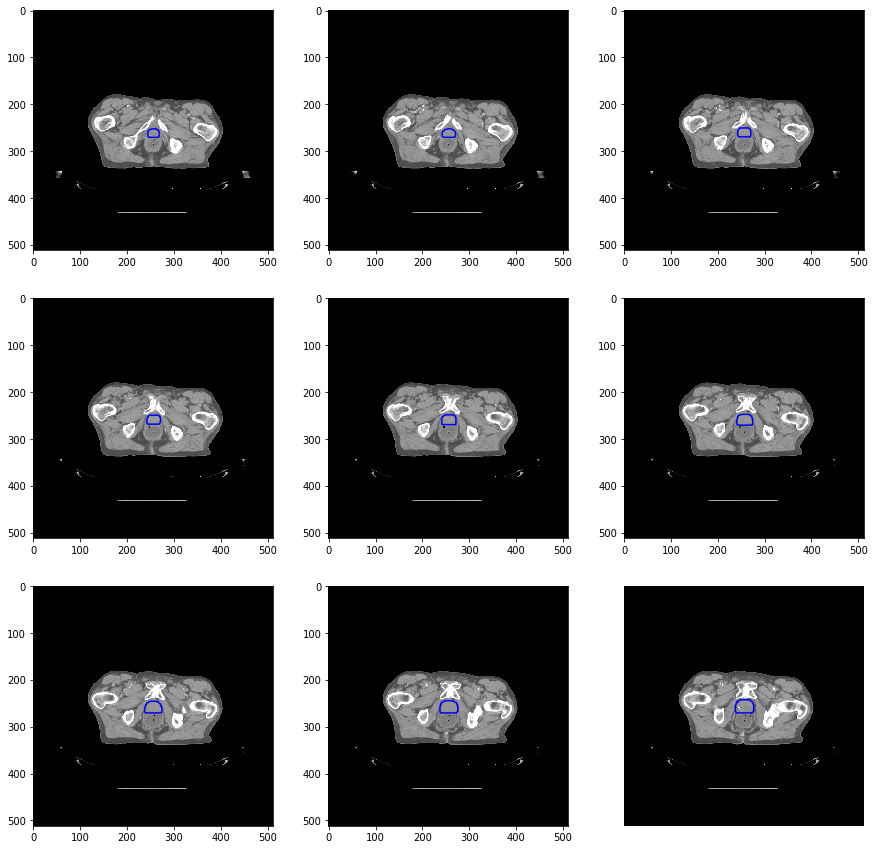

In [29]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images_7[i + roi_z_7[0], ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(labels_7[..., organ_i_7][i + roi_z_7[0], ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

In [32]:
organ_i_8 =  find_organ_i(organ, contours_8)
organ_i_8

3

In [33]:
roi_z_8 = find_roi_slices(images_8, labels_8, organ_i_8)

(-0.5, 511.5, 511.5, -0.5)

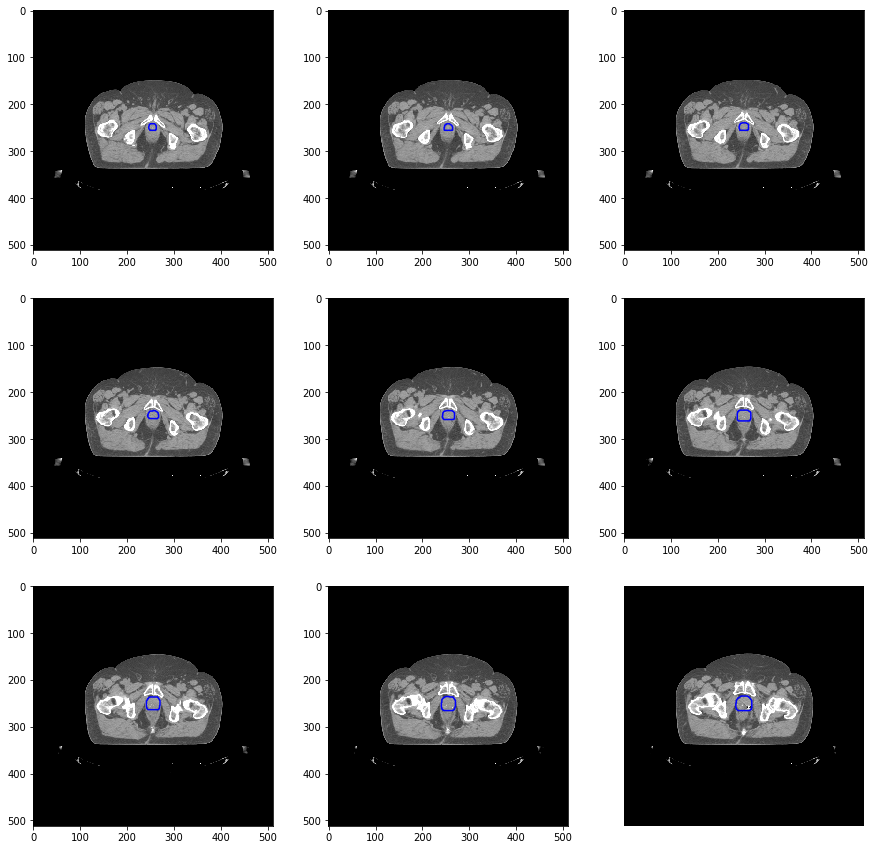

In [34]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images_8[i + roi_z_8[0], ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(labels_8[..., organ_i_8][i + roi_z_8[0], ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

In [35]:
organ_i_9 =  find_organ_i(organ, contours_9)
organ_i_9

3

In [36]:
roi_z_9 = find_roi_slices(images_9, labels_9, organ_i_9)

(-0.5, 511.5, 511.5, -0.5)

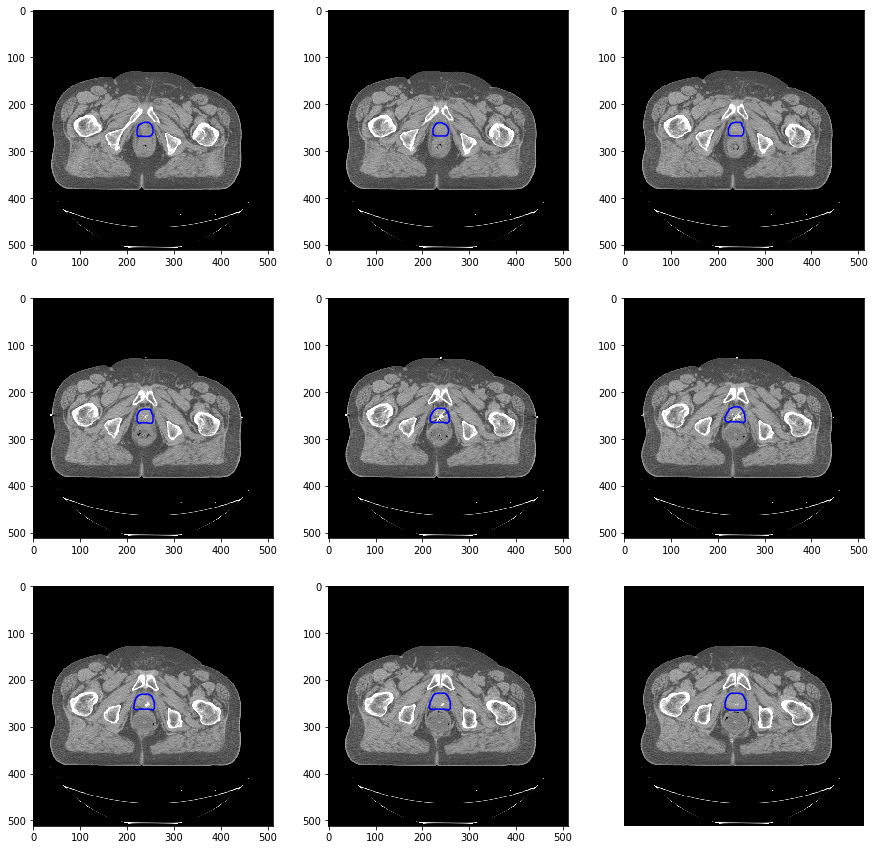

In [37]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images_9[i + roi_z_9[0], ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(labels_9[..., organ_i_9][i + roi_z_9[0], ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

In [38]:
organ_i_10 =  find_organ_i(organ, contours_10)
organ_i_10

1

In [39]:
roi_z_10 = find_roi_slices(images_10, labels_10, organ_i_10)

(-0.5, 511.5, 511.5, -0.5)

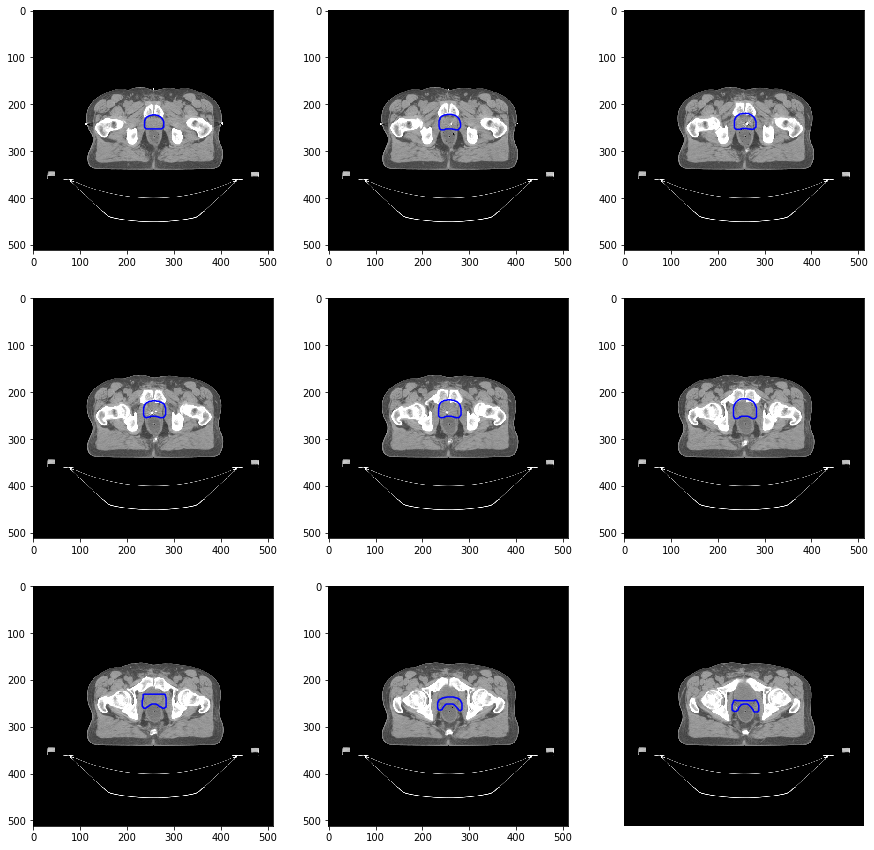

In [40]:
organ_i = 4
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images_10[i + roi_z_10[0], ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(labels_10[..., organ_i_10][i + roi_z_10[0], ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

## Paremeter Experimentation

In [41]:
def dice_coef(seg, gt, k=1):
    dice = np.sum(seg[gt==k])*2.0 / (np.sum(seg) + np.sum(gt))
    return dice

def create_log(df, c, k, w, ismax, dice):
    if ismax:
        ismax = "max"
    else: 
        ismax = "min"
    df = df.append({'c' : c, 'k' : k, 'w': w, 'min/max' : ismax, 'dice': dice},  
                ignore_index = True) 
    return df

(300.0, 200.0, 200.0, 300.0)

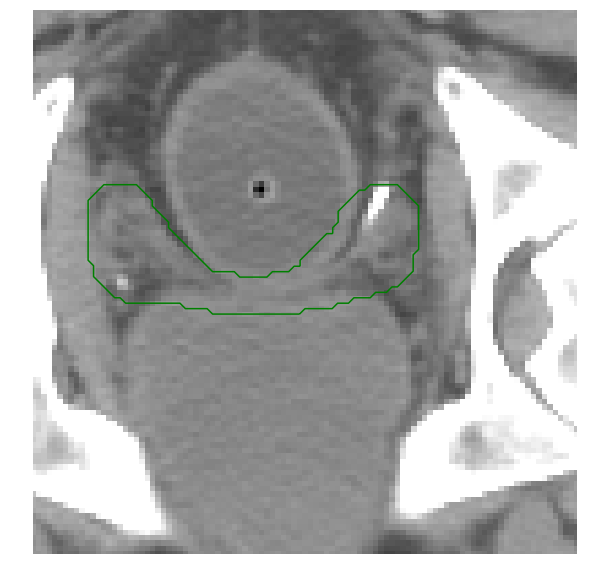

In [65]:
target_img10 = images_10[roi_z_10[10], ...]
target_label10 = labels_10[..., organ_i_10][roi_z_10[10], ...]
plt.figure(figsize=(10, 10))
plt.imshow(target_img10, cmap="gray", vmin=-250, vmax=250)
plt.contour(target_label10, levels=[0.10, 10.10, 10.10, 10.10, 10.10], colors="green")
plt.xlim(300, 200)
plt.ylim(200, 300)
plt.axis("off")

In [ ]:
target_img1 = images_1[roi_z_1[2], ...]
target_label1 = labels_1[..., organ_i_1][roi_z_1[2], ...]
dice_list = []
a=50
voxelsize = np.array([0.976562, 0.976562, 2.5])
plt.figure(figsize=(15, 15))
c_list = [1, 3, 5, 10, 15, 20, 25, 30, 35, 10, 15, 50, 55, 60, 65, 70, 75, 80, 90, 100]
k = 1
df = pd.DataFrame(columns = ['k', 'c', 'w', 'min/max', "dice"]) 
ismax=False
circles = 3
seed = 123
w = 2
for i in range(len(c_list)):
    #print("c:" +  str(c_list[i]))
    c = c_list[i]
    SD=[c*1.3, c*1.3, c*3]
    dx, dy, mask1, t1, L1, roi_z = af_Sobel.assd_Sobel(target_img1, target_label1, voxelsize, a, SD, circles, seed, k, w, images_1, labels_1, organ_i_1, ismax=ismax, smooth=True)
    du1 = af_Sobel.plotting_assd(dx, dy, mask1, target_img1, quiver=False, plot=False)
    dice = dice_coef(du1, target_label1, 1)
    dice_list.append(dice)
    df = create_log(df, c, k, w, ismax, dice)
    plt.subplot(4, 5, i + 1)
    plt.imshow(target_img1, cmap="gray", vmin=-250, vmax=250)
    plt.contour(target_label1, levels=[0.5, 1.5, 2.5, 3.5, 1.5], colors="green")
    plt.contour(du1, levels=[0.5, 1.5, 2.5, 3.5, 1.5], colors="red")
    plt.xlim(200, 300)
    plt.ylim(300, 200)
    plt.title("c = " + str(c_list[i]))
    plt.axis('off')
destination_path = "C:\\Users\\lykha\\OneDrive\\Documents\\1_PhD_Fall_2020\\Research_MDA\\contour_segmentation\\Output\\log\\"
df.to_csv(destination_path + "Dice_log_Rectum.csv")
# plot dice  
plt.figure(figsize=(5, 5))
plt.plot(c_list, dice_list, label="Dice coef")
plt.ylabel("Dice")
plt.xlabel("c*[1.7, 2, 2.5]")
plt.legend()

In [ ]:
import time
target_img3 = images_3[roi_z_3[2], ...]
target_label3 = labels_3[..., organ_i_3][roi_z_3[2], ...]
dice_list = []
a=50
voxelsize = np.array([0.976562, 0.976562, 2.5])
plt.figure(figsize=(15, 15))
c_list = [1, 3, 5, 10, 15, 20, 25, 30, 35, 30, 35, 50, 55, 60, 65, 70, 75, 80, 90, 100]
k = 10
df = pd.DataFrame(columns = ['k', 'c', 'w', 'min/max', "dice"]) 
ismax=False
circles = 3
seed = 123
w = 2
start = time.time()
for i in range(len(c_list)):
    #print("c:" +  str(c_list[i]))
    c = c_list[i]
    SD=[c*1.3, c*1.3, c*3]
    dx, dy, mask3, t1, L1, roi_z = af_Sobel.assd_Sobel(target_img3, target_label3, voxelsize, a, SD, circles, seed, k, w, images_3, labels_3, organ_i_3, ismax=ismax, smooth=True)
    du3 = af_Sobel.plotting_assd(dx, dy, mask3, target_img3, quiver=False, plot=False)
    dice = dice_coef(du3, target_label3, 1)
    dice_list.append(dice)
    df = create_log(df, c, k, w, ismax, dice)
    plt.subplot(5, 4, i + 1)
    plt.imshow(target_img3, cmap="gray", vmin=-250, vmax=250)
    plt.contour(target_label3, levels=[0.5, 1.5, 2.5, 3.5, 3.5], colors="green")
    plt.contour(du3, levels=[0.5, 1.5, 2.5, 3.5, 3.5], colors="red")
    plt.xlim(300, 180)
    plt.ylim(180, 300)
    plt.title("c = " + str(c_list[i]))
    plt.axis('off')
destination_path = "C:\\Users\\lykha\\OneDrive\\Documents\\1_PhD_Fall_2020\\Research_MDA\\contour_segmentation\\Output\\log\\"
df.to_csv(destination_path + "Dice_log_Rectum.csv")
# plot dice  
plt.figure(figsize=(5, 5))
plt.plot(c_list, dice_list, label="Dice coef")
plt.ylabel("Dice")
plt.xlabel("c*[1.7, 2, 2.5]")
plt.legend()
end = time.time()
print(end - start)

In [ ]:
roi_z_4

In [ ]:
target_img4 = images_4[roi_z_4[1], ...]
target_label4 = labels_4[..., organ_i_4][roi_z_4[1], ...]
dice_list = []
a=50
voxelsize = np.array([0.976562, 0.976562, 2.5])
plt.figure(figsize=(15, 15))
c_list = [1, 3, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 90, 100]
k = 10
df = pd.DataFrame(columns = ['k', 'c', 'w', 'min/max', "dice"]) 
ismax=False
circles = 3
seed = 123
w = 2
for i in range(len(c_list)):
    #print("c:" +  str(c_list[i]))
    c = c_list[i]
    SD=[c*1.3, c*1.3, c*3]
    dx, dy, mask4, t1, L1, roi_z = af_Sobel.assd_Sobel(target_img4, target_label4, voxelsize, a, SD, circles, seed, k, w, images_4, labels_4, organ_i_4, ismax=ismax, smooth=True)
    du4 = af_Sobel.plotting_assd(dx, dy, mask4, target_img4, quiver=False, plot=False)
    dice = dice_coef(du4, target_label4, 1)
    dice_list.append(dice)
    df = create_log(df, c, k, w, ismax, dice)
    plt.subplot(5, 4, i + 1)
    plt.imshow(target_img4, cmap="gray", vmin=-250, vmax=250)
    plt.contour(target_label4, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="green")
    plt.contour(du4, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.xlim(300, 210)
    plt.ylim(210, 300)
    plt.title("c = " + str(c_list[i]))
    plt.axis('off')
destination_path = "C:\\Users\\lykha\\OneDrive\\Documents\\1_PhD_Fall_2020\\Research_MDA\\contour_segmentation\\Output\\log\\"
df.to_csv(destination_path + "Dice_log_Rectum.csv")
# plot dice  
plt.figure(figsize=(5, 5))
plt.plot(c_list, dice_list, label="Dice coef")
plt.ylabel("Dice")
plt.xlabel("c*[1.7, 2, 2.5]")
plt.legend()

In [ ]:
target_img5 = images_5[roi_z_5[2], ...]
target_label5 = labels_5[..., organ_i_5][roi_z_5[2], ...]
dice_list = []
a=50
voxelsize = np.array([0.976562, 0.976562, 2.5])
plt.figure(figsize=(15, 15))
c_list = [1, 3, 5, 10, 15, 20, 25, 30, 35, 50, 55, 50, 55, 60, 65, 70, 75, 80, 90, 100]
k = 10
df = pd.DataFrame(columns = ['k', 'c', 'w', 'min/max', "dice"]) 
ismax=False
circles = 3
seed = 123
w = 2
for i in range(len(c_list)):
    #print("c:" +  str(c_list[i]))
    c = c_list[i]
    SD=[c*1.3, c*1.3, c*3]
    dx, dy, mask5, t1, L1, roi_z = af_Sobel.assd_Sobel(target_img5, target_label5, voxelsize, a, SD, circles, seed, k, w, images_5, labels_5, organ_i_5, ismax=ismax, smooth=True)
    du5 = af_Sobel.plotting_assd(dx, dy, mask5, target_img5, quiver=False, plot=False)
    dice = dice_coef(du5, target_label5, 1)
    dice_list.append(dice)
    df = create_log(df, c, k, w, ismax, dice)
    plt.subplot(5, 4, i + 1)
    plt.imshow(target_img5, cmap="gray", vmin=-250, vmax=250)
    plt.contour(target_label5, levels=[0.5, 1.5, 2.5, 3.5, 5.5], colors="green")
    plt.contour(du5, levels=[0.5, 1.5, 2.5, 3.5, 5.5], colors="red")
    plt.xlim(280, 230)
    plt.ylim(330, 270)
    plt.title("c = " + str(c_list[i]))
    plt.axis('off')
destination_path = "C:\\Users\\lykha\\OneDrive\\Documents\\1_PhD_Fall_2020\\Research_MDA\\contour_segmentation\\Output\\log\\"
df.to_csv(destination_path + "Dice_log_Rectum.csv")
# plot dice  
plt.figure(figsize=(15, 15))
plt.plot(c_list, dice_list, label="Dice coef")
plt.ylabel("Dice")
plt.xlabel("c*[1.7, 2, 2.5]")
plt.legend()

In [ ]:
target_img6 = images_6[roi_z_6[2], ...]
target_label6 = labels_6[..., organ_i_6][roi_z_6[2], ...]
dice_list = []
a=50
voxelsize = np.array([0.976562, 0.976562, 2.5])
plt.figure(figsize=(15, 15))
c_list = [1, 3, 5, 10, 15, 20, 25, 30, 35, 60, 65, 50, 55, 60, 65, 70, 75, 80, 90, 100]
k = 10
df = pd.DataFrame(columns = ['k', 'c', 'w', 'min/max', "dice"]) 
ismax=False
circles = 3
seed = 123
w = 2
for i in range(len(c_list)):
    #print("c:" +  str(c_list[i]))
    c = c_list[i]
    SD=[c*1.3, c*1.3, c*3]
    dx, dy, mask6, t1, L1, roi_z = af_Sobel.assd_Sobel(target_img6, target_label6, voxelsize, a, SD, circles, seed, k, w, images_6, labels_6, organ_i_6, ismax=ismax, smooth=True)
    du6 = af_Sobel.plotting_assd(dx, dy, mask6, target_img6, quiver=False, plot=False)
    dice = dice_coef(du6, target_label6, 1)
    dice_list.append(dice)
    df = create_log(df, c, k, w, ismax, dice)
    plt.subplot(5, 4, i + 1)
    plt.imshow(target_img6, cmap="gray", vmin=-250, vmax=250)
    plt.contour(target_label6, levels=[0.5, 1.5, 2.5, 3.5, 6.5], colors="green")
    plt.contour(du6, levels=[0.5, 1.5, 2.5, 3.5, 6.5], colors="red")
    plt.xlim(300, 200)
    plt.ylim(200, 300)
    plt.title("c = " + str(c_list[i]))
    plt.axis('off')
destination_path = "C:\\Users\\lykha\\OneDrive\\Documents\\1_PhD_Fall_2020\\Research_MDA\\contour_segmentation\\Output\\log\\"
df.to_csv(destination_path + "Dice_log_Rectum.csv")
# plot dice  
plt.figure(figsize=(5, 5))
plt.plot(c_list, dice_list, label="Dice coef")
plt.ylabel("Dice")
plt.xlabel("c*[1.7, 2, 2.5]")
plt.legend()

In [ ]:
target_img6 = images_7[roi_z_7[2], ...]
target_label6 = labels_7[..., organ_i_7][roi_z_7[2], ...]
dice_list = []
a=50
voxelsize = np.array([0.976562, 0.976562, 2.5])
plt.figure(figsize=(15, 15))
c_list = [1, 3, 5, 10, 15, 20, 25, 30, 35, 60, 65, 50, 55, 60, 65, 70, 75, 80, 90, 100]
k = 10
df = pd.DataFrame(columns = ['k', 'c', 'w', 'min/max', "dice"]) 
ismax=False
circles = 3
seed = 123
w = 2
for i in range(len(c_list)):
    #print("c:" +  str(c_list[i]))
    c = c_list[i]
    SD=[c*1.3, c*1.3, c*3]
    dx, dy, mask7, t1, L1, roi_z = af_Sobel.assd_Sobel(target_img7, target_label7, voxelsize, a, SD, circles, seed, k, w, images_7, labels_7, organ_i_7, ismax=ismax, smooth=True)
    du6 = af_Sobel.plotting_assd(dx, dy, mask7, target_img7, quiver=False, plot=False)
    dice = dice_coef(du7, target_label7, 1)
    dice_list.append(dice)
    df = create_log(df, c, k, w, ismax, dice)
    plt.subplot(5, 4, i + 1)
    plt.imshow(target_img7, cmap="gray", vmin=-250, vmax=250)
    plt.contour(target_label7, levels=[0.5, 1.5, 2.5, 3.5, 6.5], colors="green")
    plt.contour(du7, levels=[0.5, 1.5, 2.5, 3.5, 6.5], colors="red")
    plt.xlim(300, 200)
    plt.ylim(200, 300)
    plt.title("c = " + str(c_list[i]))
    plt.axis('off')
destination_path = "C:\\Users\\lykha\\OneDrive\\Documents\\1_PhD_Fall_2020\\Research_MDA\\contour_segmentation\\Output\\log\\"
df.to_csv(destination_path + "Dice_log_Rectum.csv")
# plot dice  
plt.figure(figsize=(5, 5))
plt.plot(c_list, dice_list, label="Dice coef")
plt.ylabel("Dice")
plt.xlabel("c*[1.7, 2, 2.5]")
plt.legend()

In [ ]:
target_img8 = images_8[roi_z_8[2], ...]
target_label8 = labels_8[..., organ_i_8][roi_z_8[2], ...]
dice_list = []
a=50
voxelsize = np.array([0.976562, 0.976562, 2.5])
plt.figure(figsize=(15, 15))
c_list = [1, 3, 5, 10, 15, 20, 25, 30, 35, 60, 65, 50, 55, 60, 65, 70, 75, 80, 90, 100]
k = 10
df = pd.DataFrame(columns = ['k', 'c', 'w', 'min/max', "dice"]) 
ismax=False
circles = 3
seed = 123
w = 2
for i in range(len(c_list)):
    #print("c:" +  str(c_list[i]))
    c = c_list[i]
    SD=[c*1.3, c*1.3, c*3]
    dx, dy, mask8, t1, L1, roi_z = af_Sobel.assd_Sobel(target_img8, target_label8, voxelsize, a, SD, circles, seed, k, w, images_8, labels_8, organ_i_8, ismax=ismax, smooth=True)
    du6 = af_Sobel.plotting_assd(dx, dy, mask8, target_img8, quiver=False, plot=False)
    dice = dice_coef(du8, target_label8, 1)
    dice_list.append(dice)
    df = create_log(df, c, k, w, ismax, dice)
    plt.subplot(5, 4, i + 1)
    plt.imshow(target_img8, cmap="gray", vmin=-250, vmax=250)
    plt.contour(target_label8, levels=[0.5, 1.5, 2.5, 3.5, 6.5], colors="green")
    plt.contour(du8, levels=[0.5, 1.5, 2.5, 3.5, 6.5], colors="red")
    plt.xlim(300, 200)
    plt.ylim(200, 300)
    plt.title("c = " + str(c_list[i]))
    plt.axis('off')
destination_path = "C:\\Users\\lykha\\OneDrive\\Documents\\1_PhD_Fall_2020\\Research_MDA\\contour_segmentation\\Output\\log\\"
df.to_csv(destination_path + "Dice_log_Rectum.csv")
# plot dice  
plt.figure(figsize=(15, 15))
plt.plot(c_list, dice_list, label="Dice coef")
plt.ylabel("Dice")
plt.xlabel("c*[1.7, 2, 2.5]")
plt.legend()

In [ ]:
target_img9 = images_9[roi_z_9[2], ...]
target_label9 = labels_9[..., organ_i_9][roi_z_9[2], ...]
dice_list = []
a=50
voxelsize = np.array([0.976562, 0.976562, 2.5])
plt.figure(figsize=(15, 15))
c_list = [1, 3, 5, 10, 15, 20, 25, 30, 35, 60, 65, 50, 55, 60, 65, 70, 75, 80, 90, 100]
k = 10
df = pd.DataFrame(columns = ['k', 'c', 'w', 'min/max', "dice"]) 
ismax=False
circles = 3
seed = 123
w = 2
for i in range(len(c_list)):
    #print("c:" +  str(c_list[i]))
    c = c_list[i]
    SD=[c*1.3, c*1.3, c*3]
    dx, dy, mask9, t1, L1, roi_z = af_Sobel.assd_Sobel(target_img9, target_label9, voxelsize, a, SD, circles, seed, k, w, images_9, labels_9, organ_i_9, ismax=ismax, smooth=True)
    du6 = af_Sobel.plotting_assd(dx, dy, mask9, target_img9, quiver=False, plot=False)
    dice = dice_coef(du9, target_label9, 1)
    dice_list.append(dice)
    df = create_log(df, c, k, w, ismax, dice)
    plt.subplot(5, 4, i + 1)
    plt.imshow(target_img9, cmap="gray", vmin=-250, vmax=250)
    plt.contour(target_label9, levels=[0.5, 1.5, 2.5, 3.5, 6.5], colors="green")
    plt.contour(du9, levels=[0.5, 1.5, 2.5, 3.5, 6.5], colors="red")
    plt.xlim(300, 200)
    plt.ylim(200, 300)
    plt.title("c = " + str(c_list[i]))
    plt.axis('off')
destination_path = "C:\\Users\\lykha\\OneDrive\\Documents\\1_PhD_Fall_2020\\Research_MDA\\contour_segmentation\\Output\\log\\"
df.to_csv(destination_path + "Dice_log_Rectum.csv")
# plot dice  
plt.figure(figsize=(5, 5))
plt.plot(c_list, dice_list, label="Dice coef")
plt.ylabel("Dice")
plt.xlabel("c*[1.7, 2, 2.5]")
plt.legend()

In [ ]:
target_img10 = images_10[roi_z_10[2], ...]
target_label10 = labels_10[..., organ_i_10][roi_z_10[2], ...]
dice_list = []
a=50
voxelsize = np.array([0.1076562, 0.1076562, 2.5])
plt.figure(figsize=(15, 15))
c_list = [1, 3, 5, 10, 15, 20, 25, 30, 35, 60, 65, 50, 55, 60, 65, 70, 75, 80, 100, 100]
k = 10
df = pd.DataFrame(columns = ['k', 'c', 'w', 'min/max', "dice"]) 
ismax=False
circles = 3
seed = 123
w = 2
for i in range(len(c_list)):
    #print("c:" +  str(c_list[i]))
    c = c_list[i]
    SD=[c*1.3, c*1.3, c*3]
    dx, dy, mask10, t1, L1, roi_z = af_Sobel.assd_Sobel(target_img10, target_label10, voxelsize, a, SD, circles, seed, k, w, images_10, labels_10, organ_i_10, ismax=ismax, smooth=True)
    du6 = af_Sobel.plotting_assd(dx, dy, mask10, target_img10, quiver=False, plot=False)
    dice = dice_coef(du10, target_label10, 1)
    dice_list.append(dice)
    df = create_log(df, c, k, w, ismax, dice)
    plt.subplot(5, 4, i + 1)
    plt.imshow(target_img10, cmap="gray", vmin=-250, vmax=250)
    plt.contour(target_label10, levels=[0.5, 1.5, 2.5, 3.5, 6.5], colors="green")
    plt.contour(du10, levels=[0.5, 1.5, 2.5, 3.5, 6.5], colors="red")
    plt.xlim(300, 200)
    plt.ylim(200, 300)
    plt.title("c = " + str(c_list[i]))
    plt.axis('off')
destination_path = "C:\\Users\\lykha\\OneDrive\\Documents\\1_PhD_Fall_2020\\Research_MDA\\contour_segmentation\\Output\\log\\"
df.to_csv(destination_path + "Dice_log_Rectum.csv")
# plot dice  
plt.figure(figsize=(5, 5))
plt.plot(c_list, dice_list, label="Dice coef")
plt.ylabel("Dice")
plt.xlabel("c*[1.7, 2, 2.5]")
plt.legend()

In [ ]:
target_imgnum = images_num[roi_z_num[2], ...]
target_labelnum = labels_num[..., organ_i_num][roi_z_num[2], ...]
dice_list = []
a=50
voxelsize = np.array([0.976562, 0.976562, 2.5])
plt.figure(figsize=(15, 15))
c_list = [1, 3, 5, 10, 15, 20, 25, 30, 35, 60, 65, 50, 55, 60, 65, 70, 75, 80, 90, 100]
k = 10
df = pd.DataFrame(columns = ['k', 'c', 'w', 'min/max', "dice"]) 
ismax=False
circles = 3
seed = 123
w = 2
for i in range(len(c_list)):
    #print("c:" +  str(c_list[i]))
    c = c_list[i]
    SD=[c*1.3, c*1.3, c*3]
    dx, dy, mask6, t1, L1, roi_z = af_Sobel.assd_Sobel(target_imgnum, target_labelnum, voxelsize, a, SD, circles, seed, k, w, images_num, labels_num, organ_i_num, ismax=ismax, smooth=True)
    du6 = af_Sobel.plotting_assd(dx, dy, masknum, target_imgnum, quiver=False, plot=False)
    dice = dice_coef(dunum, target_labelnum, 1)
    dice_list.append(dice)
    df = create_log(df, c, k, w, ismax, dice)
    plt.subplot(5, 4, i + 1)
    plt.imshow(target_imgnum, cmap="gray", vmin=-250, vmax=250)
    plt.contour(target_labelnum, levels=[0.5, 1.5, 2.5, 3.5, 6.5], colors="green")
    plt.contour(dunum, levels=[0.5, 1.5, 2.5, 3.5, 6.5], colors="red")
    plt.xlim(230, 300)
    plt.ylim(300, 250)
    plt.title("c = " + str(c_list[i]))
    plt.axis('off')
destination_path = "C:\\Users\\lykha\\OneDrive\\Documents\\1_PhD_Fall_2020\\Research_MDA\\contour_segmentation\\Output\\log\\"
df.to_csv(destination_path + "Dice_log_Rectum.csv")
# plot dice  
plt.figure(figsize=(5, 5))
plt.plot(c_list, dice_list, label="Dice coef")
plt.ylabel("Dice")
plt.xlabel("c*[1.7, 2, 2.5]")
plt.legend()